<a href="https://colab.research.google.com/github/Akshay8055143/Artificial-Intelligence-1446/blob/main/Text_Classification_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
path=r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Restaurant_Reviews.tsv'
df = pd.read_csv(path,sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [2]:
import re
def pre_process(text):
  text = text.lower()
  pattern = r'[^a-z ]'
  new = re.sub(pattern,'',text)
  return new

In [3]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df['preprocessed_review'] = df['Review'].apply(pre_process)
df.head()

,Review,Liked,preprocessed_review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


In [6]:
x = df['preprocessed_review']
y = df['Liked']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xpre = tfidf.fit_transform(x).toarray()
xpre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(xpre,y,train_size=0.8,random_state=21)

In [9]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [10]:
xtrain.shape

(800, 2046)

In [11]:
model = Sequential()
model.add(Input(shape=(xtrain.shape[1],)))
model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(units=1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
es = EarlyStopping(monitor='val_loss',patience=10)

In [14]:
nn = model.fit(xtrain,ytrain,epochs=100,validation_split=0.2,callbacks=[es],batch_size=16)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5351 - loss: 0.9026 - val_accuracy: 0.4437 - val_loss: 0.6947
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7192 - loss: 0.5245 - val_accuracy: 0.4437 - val_loss: 0.7044
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.3874 - val_accuracy: 0.4437 - val_loss: 0.7030
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8665 - loss: 0.3336 - val_accuracy: 0.4437 - val_loss: 0.6975
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.1787 - val_accuracy: 0.4688 - val_loss: 0.6878
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.1740 - val_accuracy: 0.4812 - val_loss: 0.6705
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9543 - loss: 0.1474 - val_accuracy: 0.5437 - val_loss: 0.6433
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9680 - loss: 0.1059 - val_accuracy: 0.6687 - 

## Learning Curve

Text(0, 0.5, 'Loss')

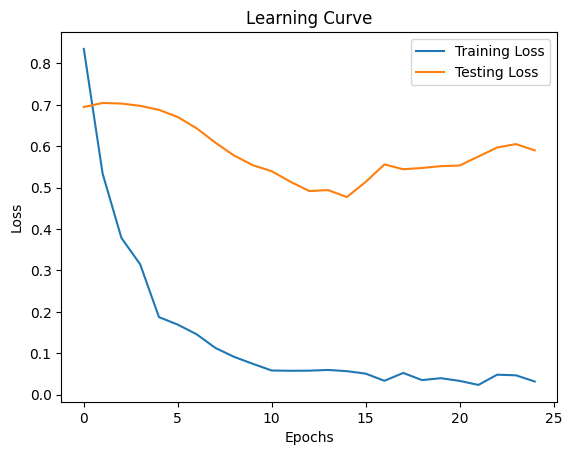

In [20]:
import matplotlib.pyplot as plt
plt.plot(nn.history["loss"],label="Training Loss")
plt.plot(nn.history["val_loss"],label="Testing Loss")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [16]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9940 - loss: 0.0199


[0.11924870312213898, 0.9624999761581421]

In [17]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8383 - loss: 0.3852


[0.5010659694671631, 0.800000011920929]

In [18]:
def predict(text):
  t1 = pre_process(text)
  newt1 = tfidf.transform([t1])
  probs = model.predict(newt1)
  if probs>0.5:
    return 'Positive'
  else:
    return 'Negative'

In [19]:
review = "Food tasted great. WIll visit agAIN..!!"
print(predict(review))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
Positive
